In [118]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import warnings
import shap

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

import xgboost as xgb

from pdpbox import pdp, info_plots
from pdpbox import pdp, info_plots

sns.set()

In [3]:
xls = pd.ExcelFile('NBT19_Definitions.xlsx')
df1_1 = xls.parse('Nodes')
df1_2 = xls.parse('Links')
df1_3 = xls.parse('Modes')
df1_4 = xls.parse('Lines')
df1_5 = xls.parse('Stations')
df1_6 = xls.parse('StationComplexes')
df1_7 = xls.parse('DayTypes')
df1_8 = xls.parse('Qhr')
df1_9 = xls.parse('Timebands')
df1_10 = xls.parse('Directions')
df1_11 = xls.parse('Movements')

In [4]:
df1_1

,NodeNo,NodeCode,NodeCode_Simple,NodeName,EntEx,MNLC,MASC,StationName
0,10101.0,BARu_StnEnt1,BARu_StnEnt1,Barbican // EntEx,1.0,501.0,BARu,Barbican
1,10124.0,BARu_MET_NB,BARu_MET_NB,Barbican // Met+Cir+H&C // NB,0.0,501.0,BARu,Barbican
2,10125.0,BARu_MET_SB,BARu_MET_SB,Barbican // Met+Cir+H&C // SB,0.0,501.0,BARu,Barbican
3,10201.0,MGTu_StnEnt1,MGTu_StnEnt1,Moorgate // EntEx,1.0,645.0,MGTu,Moorgate
4,10224.0,MGTu_MET_NB,MGTu_MET_NB,Moorgate // Met+Cir+H&C // NB,0.0,645.0,MGTu,Moorgate
...,...,...,...,...,...,...,...,...
2612,791792.0,BCRt_TRM_EB,BCRt_TRM_EB,Beckenham Road // London Trams // EB,0.0,9446.0,BCRt,Beckenham Road
2613,791793.0,BCRt_TRM_WB,BCRt_TRM_WB,Beckenham Road // London Trams // WB,0.0,9446.0,BCRt,Beckenham Road
2614,800309.0,BCJt_StnEnt1,BCJt_StnEnt1,Beckenham Junction Trams // EntEx,1.0,9445.0,BCJt,Beckenham Junction Trams
2615,800392.0,BCJt_TRM_EB,BCJt_TRM_EB,Beckenham Junction Trams // London Trams // EB,0.0,9445.0,BCJt,Beckenham Junction Trams


In [5]:
df1_2

,CodeLong,CodeLong_Simple,CodeShort,Line (Name),Line (Code),Dir,Order,StartNode,StartNodeCode,StartNodeCode_Simple,...,StartMASC,StartStationName,StartNodeName,EndNode,EndNodeCode,EndNodeCode_Simple,EndMNLC,EndMASC,EndStationName,EndNodeName
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,ELEu_BAK_NB>LAMu_BAK_NB@BAK,ELEu>LAMu@BAK,Bakerloo,BAK,NB,1,350410,ELEu_BAK_NB,ELEu_BAK_NB,...,ELEu,Elephant & Castle LU,Bakerloo // NB,310310,LAMu_BAK_NB,LAMu_BAK_NB,628,LAMu,Lambeth North,Bakerloo // NB
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,LAMu_BAK_NB>WLOu_BAK_NB@BAK,LAMu>WLOu@BAK,Bakerloo,BAK,NB,2,310310,LAMu_BAK_NB,LAMu_BAK_NB,...,LAMu,Lambeth North,Bakerloo // NB,310110,WLOu_BAK_NB,WLOu_BAK_NB,747,WLOu,Waterloo LU,Bakerloo // NB
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,WLOu_BAK_NB>EMBu_BAK_NB@BAK,WLOu>EMBu@BAK,Bakerloo,BAK,NB,3,310110,WLOu_BAK_NB,WLOu_BAK_NB,...,WLOu,Waterloo LU,Bakerloo // NB,20710,EMBu_BAK_NB,EMBu_BAK_NB,542,EMBu,Embankment,Bakerloo // NB
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,EMBu_BAK_NB>CHXu_BAK_NB@BAK,EMBu>CHXu@BAK,Bakerloo,BAK,NB,4,20710,EMBu_BAK_NB,EMBu_BAK_NB,...,EMBu,Embankment,Bakerloo // NB,20610,CHXu_BAK_NB,CHXu_BAK_NB,718,CHXu,Charing Cross LU,Bakerloo // NB
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,CHXu_BAK_NB>PICu_BAK_NB@BAK,CHXu>PICu@BAK,Bakerloo,BAK,NB,5,20610,CHXu_BAK_NB,CHXu_BAK_NB,...,CHXu,Charing Cross LU,Bakerloo // NB,20110,PICu_BAK_NB,PICu_BAK_NB,674,PICu,Piccadilly Circus,Bakerloo // NB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,PIMu_VIC_SB>VUXu_VIC_SB@VIC,PIMu_VIC_SB>VUXu_VIC_SB@VIC,PIMu>VUXu@VIC,Victoria,VIC,SB,13,40333,PIMu_VIC_SB,PIMu_VIC_SB,...,PIMu,Pimlico,Victoria // SB,320133,VUXu_VIC_SB,VUXu_VIC_SB,777,VUXu,Vauxhall LU,Victoria // SB
1153,VUXu_VIC_SB>STKu_VIC_SB@VIC,VUXu_VIC_SB>STKu_VIC_SB@VIC,VUXu>STKu@VIC,Victoria,VIC,SB,14,320133,VUXu_VIC_SB,VUXu_VIC_SB,...,VUXu,Vauxhall LU,Victoria // SB,320333,STKu_VIC_SB,STKu_VIC_SB,716,STKu,Stockwell,Victoria // SB
1154,STKu_VIC_SB>BRXu_VIC_SB@VIC,STKu_VIC_SB>BRXu_VIC_SB@VIC,STKu>BRXu@VIC,Victoria,VIC,SB,15,320333,STKu_VIC_SB,STKu_VIC_SB,...,STKu,Stockwell,Victoria // SB,330333,BRXu_VIC_SB,BRXu_VIC_SB,778,BRXu,Brixton LU,Victoria // SB
1155,WLOu_WAC_EB>BNKu_WAC_EB@WAC,WLOu_WAC_EB>BNKu_WAC_EB@WAC,WLOu>BNKu@WAC,Waterloo & City,WAC,EB,1,310135,WLOu_WAC_EB,WLOu_WAC_EB,...,WLOu,Waterloo LU,Waterloo & City // EB,10535,BNKu_WAC_EB,BNKu_WAC_EB,513,BNKu,Bank and Monument,Waterloo & City // EB


In [6]:
df1_3

,modeID,mode,modecode,modedescription
0,10,LU,u,London Underground
1,30,LO,o,London Overground
2,40,EZL,r,Elizabeth Line
3,50,DLR,d,Docklands Light Railway
4,60,NR,r,National Rail
5,70,TRM,t,London Trams


In [7]:
df1_4

,Tsys,LineCode,LineName,lineNo,modeID
0,u_BAK,BAK,Bakerloo,11,10
1,u_CEN,CEN,Central,12,10
2,u_DIS,DIS,District,13,10
3,u_HAM,HAM,H&C and Circle,14,10
4,u_JUB,JUB,Jubilee,15,10
5,u_MET,MET,Metropolitan,16,10
6,u_NOR,NOR,Northern,17,10
7,u_PIC,PIC,Piccadilly,18,10
8,u_VIC,VIC,Victoria,19,10
9,u_WAT,WAC,Waterloo & City,20,10


In [11]:
df=pd.merge(df1_3,df1_4,on='modeID',how='left')
df
df=pd.merge(df,df1_2,left_on='LineCode',right_on='Line (Code)',how='left')
df

,modeID,mode,modecode,modedescription,Tsys,LineCode,LineName,lineNo,CodeLong,CodeLong_Simple,...,StartMASC,StartStationName,StartNodeName,EndNode,EndNodeCode,EndNodeCode_Simple,EndMNLC,EndMASC,EndStationName,EndNodeName
0,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,ELEu_BAK_NB>LAMu_BAK_NB@BAK,ELEu_BAK_NB>LAMu_BAK_NB@BAK,...,ELEu,Elephant & Castle LU,Bakerloo // NB,310310.0,LAMu_BAK_NB,LAMu_BAK_NB,628.0,LAMu,Lambeth North,Bakerloo // NB
1,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,LAMu_BAK_NB>WLOu_BAK_NB@BAK,LAMu_BAK_NB>WLOu_BAK_NB@BAK,...,LAMu,Lambeth North,Bakerloo // NB,310110.0,WLOu_BAK_NB,WLOu_BAK_NB,747.0,WLOu,Waterloo LU,Bakerloo // NB
2,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,WLOu_BAK_NB>EMBu_BAK_NB@BAK,WLOu_BAK_NB>EMBu_BAK_NB@BAK,...,WLOu,Waterloo LU,Bakerloo // NB,20710.0,EMBu_BAK_NB,EMBu_BAK_NB,542.0,EMBu,Embankment,Bakerloo // NB
3,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,EMBu_BAK_NB>CHXu_BAK_NB@BAK,EMBu_BAK_NB>CHXu_BAK_NB@BAK,...,EMBu,Embankment,Bakerloo // NB,20610.0,CHXu_BAK_NB,CHXu_BAK_NB,718.0,CHXu,Charing Cross LU,Bakerloo // NB
4,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,CHXu_BAK_NB>PICu_BAK_NB@BAK,CHXu_BAK_NB>PICu_BAK_NB@BAK,...,CHXu,Charing Cross LU,Bakerloo // NB,20110.0,PICu_BAK_NB,PICu_BAK_NB,674.0,PICu,Piccadilly Circus,Bakerloo // NB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,BGWt_TRM_WB>PHLt_TRM_WB@TRM,BGWt_TRM_WB>PHLt_TRM_WB@TRM,...,BGWt,Belgrave Walk,London Trams // WB,742193.0,PHLt_TRM_WB,PHLt_TRM_WB,9485.0,PHLt,Phipps Bridge,London Trams // WB
1172,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,PHLt_TRM_WB>MRDt_TRM_WB@TRM,PHLt_TRM_WB>MRDt_TRM_WB@TRM,...,PHLt,Phipps Bridge,London Trams // WB,741593.0,MRDt_TRM_WB,MRDt_TRM_WB,9482.0,MRDt,Morden Road,London Trams // WB
1173,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,MRDt_TRM_WB>MPKt_TRM_WB@TRM,MRDt_TRM_WB>MPKt_TRM_WB@TRM,...,MRDt,Morden Road,London Trams // WB,740893.0,MPKt_TRM_WB,MPKt_TRM_WB,9479.0,MPKt,Merton Park,London Trams // WB
1174,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,MPKt_TRM_WB>DDRt_TRM_WB@TRM,MPKt_TRM_WB>DDRt_TRM_WB@TRM,...,MPKt,Merton Park,London Trams // WB,742093.0,DDRt_TRM_WB,DDRt_TRM_WB,9468.0,DDRt,Dundonald Road,London Trams // WB


In [13]:
df1_5

,MNLC,MASC,StationName,TFL?
0,500.0,ACTu,Acton Town,True
1,501.0,BARu,Barbican,True
2,502.0,ALDu,Aldgate,True
3,503.0,ALEu,Aldgate East,True
4,504.0,STId,Stratford International DLR,True
...,...,...,...,...
732,9445.0,BCJt,Beckenham Junction Trams,True
733,9460.0,CSTt,Church Street,True
734,9471.0,ELMt,Elmers End,True
735,9473.0,GSTt,George Street,True


In [14]:
df1_6

,MNLC,MASC,Unique Station Name,ComplexNLC,ComplexASC,ComplexName
0,502,ALDu,Aldgate,502,ALDu,Aldgate
1,731,THLu,Tower Hill,502,ALDu,Aldgate
2,864,TOGd,Tower Gateway,502,ALDu,Aldgate
3,7490,FSTr,Fenchurch Street,502,ALDu,Aldgate
4,504,STId,Stratford International DLR,504,STId,Stratford International DLR
...,...,...,...,...,...,...
109,7408,WNPr,Wanstead Park,7408,WNPr,Wanstead Park
110,6883,MNPr,Manor Park,7467,WGRr,Woodgrange Park
111,7467,WGRr,Woodgrange Park,7467,WGRr,Woodgrange Park
112,700,SBCu,Shepherd's Bush LU,9587,SPBr,Shepherd's Bush NR


In [15]:
df1=pd.merge(df1_5,df1_6,on='MASC',how='left')
df1

,MNLC_x,MASC,StationName,TFL?,MNLC_y,Unique Station Name,ComplexNLC,ComplexASC,ComplexName
0,500.0,ACTu,Acton Town,True,NaN,NaN,NaN,NaN,NaN
1,501.0,BARu,Barbican,True,NaN,NaN,NaN,NaN,NaN
2,502.0,ALDu,Aldgate,True,502.0,Aldgate,502.0,ALDu,Aldgate
3,503.0,ALEu,Aldgate East,True,NaN,NaN,NaN,NaN,NaN
4,504.0,STId,Stratford International DLR,True,504.0,Stratford International DLR,504.0,STId,Stratford International DLR
...,...,...,...,...,...,...,...,...,...
732,9445.0,BCJt,Beckenham Junction Trams,True,NaN,NaN,NaN,NaN,NaN
733,9460.0,CSTt,Church Street,True,NaN,NaN,NaN,NaN,NaN
734,9471.0,ELMt,Elmers End,True,NaN,NaN,NaN,NaN,NaN
735,9473.0,GSTt,George Street,True,NaN,NaN,NaN,NaN,NaN


In [17]:
df=pd.merge(df,df1,left_on='StartStationName',right_on='StationName',how='left')
df=pd.merge(df,df1,left_on='EndStationName',right_on='StationName',how='left')
df

,modeID,mode,modecode,modedescription,Tsys,LineCode,LineName,lineNo,CodeLong,CodeLong_Simple,...,ComplexName_x,MNLC_x_y,MASC_y,StationName_y,TFL?_y,MNLC_y_y,Unique Station Name_y,ComplexNLC_y,ComplexASC_y,ComplexName_y
0,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,ELEu_BAK_NB>LAMu_BAK_NB@BAK,ELEu_BAK_NB>LAMu_BAK_NB@BAK,...,Elephant & Castle LU,628.0,LAMu,Lambeth North,True,NaN,NaN,NaN,NaN,NaN
1,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,LAMu_BAK_NB>WLOu_BAK_NB@BAK,LAMu_BAK_NB>WLOu_BAK_NB@BAK,...,NaN,747.0,WLOu,Waterloo LU,True,747.0,Waterloo LU,747.0,WLOu,Waterloo LU
2,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,WLOu_BAK_NB>EMBu_BAK_NB@BAK,WLOu_BAK_NB>EMBu_BAK_NB@BAK,...,Waterloo LU,542.0,EMBu,Embankment,True,542.0,Embankment,542.0,EMBu,Embankment
3,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,EMBu_BAK_NB>CHXu_BAK_NB@BAK,EMBu_BAK_NB>CHXu_BAK_NB@BAK,...,Embankment,718.0,CHXu,Charing Cross LU,True,718.0,Charing Cross LU,542.0,EMBu,Embankment
4,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,CHXu_BAK_NB>PICu_BAK_NB@BAK,CHXu_BAK_NB>PICu_BAK_NB@BAK,...,Embankment,674.0,PICu,Piccadilly Circus,True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,BGWt_TRM_WB>PHLt_TRM_WB@TRM,BGWt_TRM_WB>PHLt_TRM_WB@TRM,...,NaN,9485.0,PHLt,Phipps Bridge,True,NaN,NaN,NaN,NaN,NaN
1178,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,PHLt_TRM_WB>MRDt_TRM_WB@TRM,PHLt_TRM_WB>MRDt_TRM_WB@TRM,...,NaN,9482.0,MRDt,Morden Road,True,NaN,NaN,NaN,NaN,NaN
1179,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,MRDt_TRM_WB>MPKt_TRM_WB@TRM,MRDt_TRM_WB>MPKt_TRM_WB@TRM,...,NaN,9479.0,MPKt,Merton Park,True,NaN,NaN,NaN,NaN,NaN
1180,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,MPKt_TRM_WB>DDRt_TRM_WB@TRM,MPKt_TRM_WB>DDRt_TRM_WB@TRM,...,NaN,9468.0,DDRt,Dundonald Road,True,NaN,NaN,NaN,NaN,NaN


In [19]:
df.columns

Index(['modeID', 'mode', 'modecode', 'modedescription', 'Tsys', 'LineCode',
       'LineName', 'lineNo', 'CodeLong', 'CodeLong_Simple', 'CodeShort',
       'Line (Name)', 'Line (Code)', 'Dir', 'Order', 'StartNode',
       'StartNodeCode', 'StartNodeCode_Simple', 'StartMNLC', 'StartMASC',
       'StartStationName', 'StartNodeName', 'EndNode', 'EndNodeCode',
       'EndNodeCode_Simple', 'EndMNLC', 'EndMASC', 'EndStationName',
       'EndNodeName', 'MNLC_x_x', 'MASC_x', 'StationName_x', 'TFL?_x',
       'MNLC_y_x', 'Unique Station Name_x', 'ComplexNLC_x', 'ComplexASC_x',
       'ComplexName_x', 'MNLC_x_y', 'MASC_y', 'StationName_y', 'TFL?_y',
       'MNLC_y_y', 'Unique Station Name_y', 'ComplexNLC_y', 'ComplexASC_y',
       'ComplexName_y'],
      dtype='object')

In [21]:
df=df.drop(columns=['MNLC_x_x', 'MASC_x', 'StationName_x','MNLC_y_x', 'MNLC_x_y', 'MASC_y', 'StationName_y','MNLC_y_y'])
df

,modeID,mode,modecode,modedescription,Tsys,LineCode,LineName,lineNo,CodeLong,CodeLong_Simple,...,TFL?_x,Unique Station Name_x,ComplexNLC_x,ComplexASC_x,ComplexName_x,TFL?_y,Unique Station Name_y,ComplexNLC_y,ComplexASC_y,ComplexName_y
0,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,ELEu_BAK_NB>LAMu_BAK_NB@BAK,ELEu_BAK_NB>LAMu_BAK_NB@BAK,...,True,Elephant & Castle LU,570.0,ELEu,Elephant & Castle LU,True,NaN,NaN,NaN,NaN
1,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,LAMu_BAK_NB>WLOu_BAK_NB@BAK,LAMu_BAK_NB>WLOu_BAK_NB@BAK,...,True,NaN,NaN,NaN,NaN,True,Waterloo LU,747.0,WLOu,Waterloo LU
2,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,WLOu_BAK_NB>EMBu_BAK_NB@BAK,WLOu_BAK_NB>EMBu_BAK_NB@BAK,...,True,Waterloo LU,747.0,WLOu,Waterloo LU,True,Embankment,542.0,EMBu,Embankment
3,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,EMBu_BAK_NB>CHXu_BAK_NB@BAK,EMBu_BAK_NB>CHXu_BAK_NB@BAK,...,True,Embankment,542.0,EMBu,Embankment,True,Charing Cross LU,542.0,EMBu,Embankment
4,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,CHXu_BAK_NB>PICu_BAK_NB@BAK,CHXu_BAK_NB>PICu_BAK_NB@BAK,...,True,Charing Cross LU,542.0,EMBu,Embankment,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,BGWt_TRM_WB>PHLt_TRM_WB@TRM,BGWt_TRM_WB>PHLt_TRM_WB@TRM,...,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1178,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,PHLt_TRM_WB>MRDt_TRM_WB@TRM,PHLt_TRM_WB>MRDt_TRM_WB@TRM,...,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1179,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,MRDt_TRM_WB>MPKt_TRM_WB@TRM,MRDt_TRM_WB>MPKt_TRM_WB@TRM,...,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1180,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,MPKt_TRM_WB>DDRt_TRM_WB@TRM,MPKt_TRM_WB>DDRt_TRM_WB@TRM,...,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['modeID', 'mode', 'modecode', 'modedescription', 'Tsys', 'LineCode',
       'LineName', 'lineNo', 'CodeLong', 'CodeLong_Simple', 'CodeShort',
       'Line (Name)', 'Line (Code)', 'Dir', 'Order', 'StartNode',
       'StartNodeCode', 'StartNodeCode_Simple', 'StartMNLC', 'StartMASC',
       'StartStationName', 'StartNodeName', 'EndNode', 'EndNodeCode',
       'EndNodeCode_Simple', 'EndMNLC', 'EndMASC', 'EndStationName',
       'EndNodeName', 'TFL?_x', 'Unique Station Name_x', 'ComplexNLC_x',
       'ComplexASC_x', 'ComplexName_x', 'TFL?_y', 'Unique Station Name_y',
       'ComplexNLC_y', 'ComplexASC_y', 'ComplexName_y'],
      dtype='object')

In [23]:
df=df.rename(columns={'TFL?_x':'StartTFL', 'Unique Station Name_x':'StartUnique Station Name', 'ComplexNLC_x':'StartComplexNLC',
       'ComplexASC_x':'StartComplexASC', 'ComplexName_x':'StartComplexName', 'TFL?_y':'EndTFL', 'Unique Station Name_y':'EndUnique Station Name',
       'ComplexNLC_y':'EndComplexNLC', 'ComplexASC_y':'EndComplexASC', 'ComplexName_y':'EndComplexName'})
df

,modeID,mode,modecode,modedescription,Tsys,LineCode,LineName,lineNo,CodeLong,CodeLong_Simple,...,StartTFL,StartUnique Station Name,StartComplexNLC,StartComplexASC,StartComplexName,EndTFL,EndUnique Station Name,EndComplexNLC,EndComplexASC,EndComplexName
0,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,ELEu_BAK_NB>LAMu_BAK_NB@BAK,ELEu_BAK_NB>LAMu_BAK_NB@BAK,...,True,Elephant & Castle LU,570.0,ELEu,Elephant & Castle LU,True,NaN,NaN,NaN,NaN
1,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,LAMu_BAK_NB>WLOu_BAK_NB@BAK,LAMu_BAK_NB>WLOu_BAK_NB@BAK,...,True,NaN,NaN,NaN,NaN,True,Waterloo LU,747.0,WLOu,Waterloo LU
2,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,WLOu_BAK_NB>EMBu_BAK_NB@BAK,WLOu_BAK_NB>EMBu_BAK_NB@BAK,...,True,Waterloo LU,747.0,WLOu,Waterloo LU,True,Embankment,542.0,EMBu,Embankment
3,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,EMBu_BAK_NB>CHXu_BAK_NB@BAK,EMBu_BAK_NB>CHXu_BAK_NB@BAK,...,True,Embankment,542.0,EMBu,Embankment,True,Charing Cross LU,542.0,EMBu,Embankment
4,10,LU,u,London Underground,u_BAK,BAK,Bakerloo,11,CHXu_BAK_NB>PICu_BAK_NB@BAK,CHXu_BAK_NB>PICu_BAK_NB@BAK,...,True,Charing Cross LU,542.0,EMBu,Embankment,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,BGWt_TRM_WB>PHLt_TRM_WB@TRM,BGWt_TRM_WB>PHLt_TRM_WB@TRM,...,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1178,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,PHLt_TRM_WB>MRDt_TRM_WB@TRM,PHLt_TRM_WB>MRDt_TRM_WB@TRM,...,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1179,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,MRDt_TRM_WB>MPKt_TRM_WB@TRM,MRDt_TRM_WB>MPKt_TRM_WB@TRM,...,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1180,70,TRM,t,London Trams,t_TRM,TRM,London Trams,52,MPKt_TRM_WB>DDRt_TRM_WB@TRM,MPKt_TRM_WB>DDRt_TRM_WB@TRM,...,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


In [24]:
df1_7

,Daytype,Daytype description,Comment
0,MTF,Monday to Friday,Only in NBT 2017
1,MTT,Monday to Thursday,From NBT 2018 onwards
2,FRI,Friday,From NBT 2018 onwards
3,SAT,Saturday,NaN
4,SUN,Sunday,NaN


In [25]:
df1_8

,Time,Qhr,Timeband,Hour
0,0500-0515,21,2,5
1,0515-0530,22,2,5
2,0530-0545,23,2,5
3,0545-0600,24,2,5
4,0600-0615,25,2,6
...,...,...,...,...
91,0345-0400,112,1,27
92,0400-0415,113,1,28
93,0415-0430,114,1,28
94,0430-0445,115,1,28


In [26]:
df1_9

,Timeband,Timeband Description,Timeband hours,Unnamed: 3
0,2,Morning,0500-0700,NaN
1,3,AM Peak,0700-1000,NaN
2,4,Inter Peak,1000-1600,NaN
3,5,PM Peak,1600-1900,NaN
4,6,Evening,1900-2200,NaN
5,7,Late,2200-0030,NaN
6,8,Night,0030-0300,Night' ad 'Early' are aggregated when reported...
7,1,Early,0300-0500,Night' ad 'Early' are aggregated when reported...


In [27]:
df1=pd.merge(df1_8,df1_9,on='Timeband',how='left')
df1

,Time,Qhr,Timeband,Hour,Timeband Description,Timeband hours,Unnamed: 3
0,0500-0515,21,2,5,Morning,0500-0700,NaN
1,0515-0530,22,2,5,Morning,0500-0700,NaN
2,0530-0545,23,2,5,Morning,0500-0700,NaN
3,0545-0600,24,2,5,Morning,0500-0700,NaN
4,0600-0615,25,2,6,Morning,0500-0700,NaN
...,...,...,...,...,...,...,...
91,0345-0400,112,1,27,Early,0300-0500,Night' ad 'Early' are aggregated when reported...
92,0400-0415,113,1,28,Early,0300-0500,Night' ad 'Early' are aggregated when reported...
93,0415-0430,114,1,28,Early,0300-0500,Night' ad 'Early' are aggregated when reported...
94,0430-0445,115,1,28,Early,0300-0500,Night' ad 'Early' are aggregated when reported...


In [30]:
dict=df1.set_index('Timeband hours')['Timeband Description'].to_dict()
dict

{'0500-0700': 'Morning',
 '0700-1000': 'AM Peak',
 '1000-1600': 'Inter Peak',
 '1600-1900': 'PM Peak',
 '1900-2200': 'Evening',
 '2200-0030': 'Late',
 '0030-0300': 'Night',
 '0300-0500': 'Early'}

In [18]:
df1_10

,Direction_Code,Direction_Name,Direction_Comment
0,NB,Northbound,NaN
1,SB,Southbound,NaN
2,EB,Eastbound,NaN
3,WB,Westbound,NaN
4,IB,Inbound,Applies to DLR. Inbound = towards City/Stratford
5,OB,Outbound,Applies to DLR. Outbound = from City/Stratford
6,UP,Up,Applies to National Rail. Up = towards London
7,DN,Down,Applies to National Rail. Down = from London
8,IR,Inner Rail,Applies to Circle line
9,OR,Outer Rail,Applies to Circle line


In [19]:
df1_11

,MovementCode,MovementName,Interchange type
0,_N_,Enter-Board,NaN
1,_X_,Alight-Exit,NaN
2,_I_,Alight-Interchange-Board,Interchange within single station
3,_O_,Alight-Exit-Interchange-Enter-Board,Out of station interchange


In [127]:
xls = pd.ExcelFile('NBT19FRI_Outputs.xlsx')
df2_1 = xls.parse('Link_Loads', skiprows=2, index_col=None, na_values=['NA'])
df2_2 = xls.parse('Link_Frequencies', skiprows=2, index_col=None, na_values=['NA'])
df2_3 = xls.parse('Line_Boarders', skiprows=2, index_col=None, na_values=['NA'])
df2_4 = xls.parse('Station_Flows', skiprows=2, index_col=None, na_values=['NA'])
df2_5 = xls.parse('Station_Entries', skiprows=2, index_col=None, na_values=['NA'])
df2_6 = xls.parse('Station_Exits', skiprows=2, index_col=None, na_values=['NA'])
df2_7 = xls.parse('Station_Boarders', skiprows=2, index_col=None, na_values=['NA'])
df2_8 = xls.parse('Station_Alighters', skiprows=2, index_col=None, na_values=['NA'])

In [128]:
df2_1

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,...,181.8698,180.6104,151.423,149.2764,121.8740,124.1874,106.9884,110.5732,83.2116,66.8552
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,...,156.2534,153.6102,131.510,128.3456,108.2102,109.7876,97.0138,95.4412,72.1658,56.2962
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,...,114.5716,117.2824,94.522,95.6106,75.8290,79.5670,66.0882,69.8414,51.3704,41.3934
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [129]:
df2_1=df2_1.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df2_1.columns

Index(['Link', 'Line', 'Dir', 'Order', 'From NLC', 'From ASC', 'From Station',
       'To NLC', 'To ASC', 'To Station', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [137]:
df2_1.describe(include='all')

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
count,1141,1141,1141,1141.000000,1141.000000,1141,1141,1141.000000,1141,1141,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
unique,1141,19,8,NaN,NaN,455,455,NaN,455,455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,STGu_DIS_EB>MLEu_DIS_EB@HAM,District,EB,NaN,NaN,BNKu,King's Cross St. Pancras,NaN,BNKu,Bank and Monument,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,118,258,NaN,NaN,10,10,NaN,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,20.110429,1977.763365,NaN,NaN,1977.767748,NaN,NaN,39966.975197,1640.254355,9494.556026,10126.136765,10296.017709,5153.799369,3256.210972
std,NaN,NaN,NaN,13.869065,2741.098547,NaN,NaN,2741.173963,NaN,NaN,42782.546739,2075.340669,11006.014031,11453.412386,11401.585352,6051.615869,4607.493694
min,NaN,NaN,NaN,1.000000,500.000000,NaN,NaN,500.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,9.000000,598.000000,NaN,NaN,598.000000,NaN,NaN,9831.556000,346.744600,2073.823600,2427.500000,2333.000000,1019.908800,382.254200
50%,NaN,NaN,NaN,18.000000,708.000000,NaN,NaN,708.000000,NaN,NaN,23404.726000,778.262800,5248.051000,5680.979600,5951.955600,2811.626800,1309.445200
75%,NaN,NaN,NaN,29.000000,928.000000,NaN,NaN,928.000000,NaN,NaN,55899.251000,2099.471000,12390.584200,13368.863400,14500.402200,6926.429800,4076.785600


In [130]:
df2_1

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,18239.6760,586.8548,5432.5334,5418.6796,4336.7920,1692.8796,771.9366
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,23741.7960,646.6012,6414.0846,7390.5006,5877.6760,2372.1998,1040.7338
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,60705.0200,1618.2130,19007.7866,17289.1650,14557.3206,5814.7818,2417.7530
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,69351.7670,1650.0988,18712.4386,20560.7280,17851.8210,7371.7074,3204.9732
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,80044.1610,1891.1744,20493.1056,23140.8708,20616.7204,9229.2240,4673.0658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,125243.7902,3775.9082,20094.8256,24391.6908,35905.7100,23436.7700,17638.8856
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,82608.7680,1135.7602,8392.9094,16531.9472,25762.0870,17407.5890,13378.4752
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,50003.7792,577.6500,5134.2788,9480.7786,14614.8274,10955.8188,9240.4256
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,33227.7310,1194.6684,18139.8848,6034.8384,5405.8852,1832.8140,619.6402


In [170]:
col=['Line','Dir','Order','From NLC','To Station']



In [175]:
def preprocess(dataset):
    X = pd.DataFrame()

    X = dataset[col]
    
    Y = dataset['Total']

    # Label encoding for categorical variables
    label_encoder = LabelEncoder()

    
    X['Link'] = label_encoder.fit_transform(dataset['Link'])
    X['Line'] = label_encoder.fit_transform(dataset['Line'])
    X['Dir'] = label_encoder.fit_transform(dataset['Dir'])
    #X['From Station'] = label_encoder.fit_transform(dataset['From Station'])
    #X['To ASC'] = label_encoder.fit_transform(dataset['To ASC'])
    X['To Station'] = label_encoder.fit_transform(dataset['To Station'])


    return X, Y

In [176]:
processed_dataset = preprocess(df2_1)
X_train, X_test, Y_train, Y_test = train_test_split(*processed_dataset, test_size=0.3, shuffle=True)

Text(0.5, 1.0, 'Correlation Heatmap')

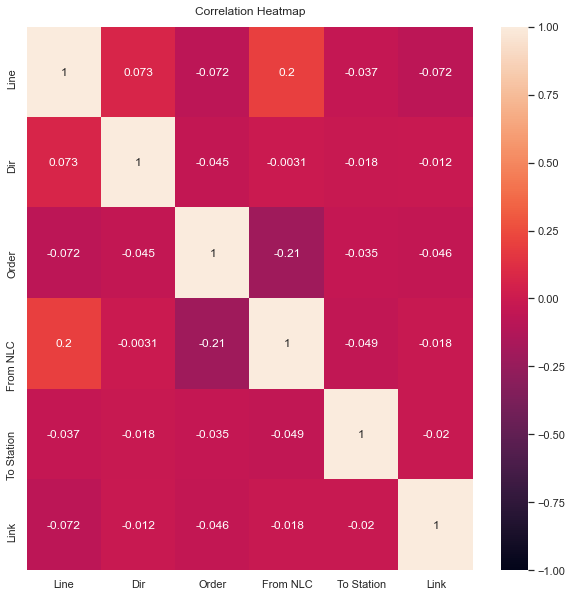

In [177]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [178]:
shap.initjs()
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
booster = model.get_booster()
model2 = booster.save_raw()[4:]
booster.save_raw = lambda: model2
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test, approximate=True)
index = 110
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

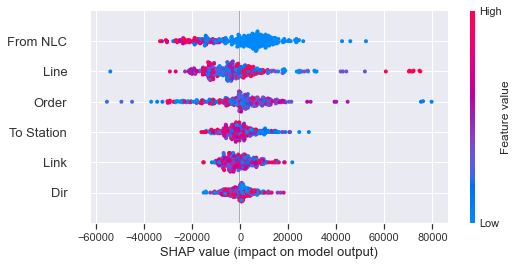

In [179]:
shap.summary_plot(shap_values, X_test)

In [38]:
df2_2

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,...,0,0,0,0,0,0,0,0,0,0
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,...,0,0,0,0,0,0,0,0,0,0
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,...,0,0,0,0,0,0,0,0,0,0
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,...,0,0,0,0,0,0,0,0,0,0
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,...,1,2,1,2,1,2,1,2,1,2
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,...,1,2,1,2,1,2,1,2,1,2
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,...,1,2,1,2,1,2,1,2,1,1
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df2_2=df2_2.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df2_2.columns

Index(['Link', 'Line', 'Dir', 'Order', 'From NLC', 'From ASC', 'From Station',
       'To NLC', 'To ASC', 'To Station', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [86]:
df2_2

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,350,12,62,116,63,59,38
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,350,12,62,116,62,60,38
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,357,16,64,116,63,59,39
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,357,15,64,117,62,60,39
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,357,15,64,116,63,59,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,564,28,105,164,105,84,78
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,564,27,105,164,105,85,78
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,563,26,105,164,105,85,78
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,301,21,64,74,64,51,27


In [39]:
df2_3

,Mode,Line Code,Line Name,Total,Early,AM Peak,Midday,PM Peak,Evening,Late,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,LU,BAK,Bakerloo,4.186829e+05,9834.477802,8.530791e+04,1.226424e+05,1.126251e+05,5.794796e+04,30325.068605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,LU,CEN,Central,1.005729e+06,40579.852624,2.137923e+05,2.783749e+05,2.633824e+05,1.271002e+05,82498.827607,...,1085.162998,965.174198,956.843198,822.108800,818.473000,743.891000,704.137800,530.238200,413.854200,261.979800
2,LU,DIS,District,8.364910e+05,33402.295592,1.924213e+05,2.414369e+05,2.188500e+05,9.951310e+04,50867.413207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,LU,HAM,H&C and Circle,4.790675e+05,17560.595828,1.018927e+05,1.511881e+05,1.238845e+05,5.487489e+04,29666.776809,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,LU,JUB,Jubilee,9.021106e+05,41462.774279,2.087108e+05,2.340782e+05,2.326444e+05,1.113372e+05,73877.247208,...,797.957601,737.079600,703.665800,651.511199,629.149999,595.413199,570.444399,465.789199,357.327999,235.395800
5,LU,MET,Metropolitan,3.182329e+05,14646.818001,7.970391e+04,8.010535e+04,9.178107e+04,3.604458e+04,15951.143405,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,LU,NOR,Northern,1.138643e+06,34284.153007,2.439665e+05,3.057399e+05,2.896926e+05,1.540769e+05,110883.217056,...,1088.896802,1007.483003,957.507802,868.195602,827.505400,745.733000,669.404399,524.963599,392.798999,248.579400
7,LU,PIC,Piccadilly,7.281014e+05,27389.546001,1.415532e+05,2.085311e+05,1.811542e+05,9.933391e+04,70139.517016,...,838.155800,792.989800,750.935200,706.598200,681.359000,642.195001,585.208001,479.499801,356.136801,233.629201
8,LU,VIC,Victoria,1.005041e+06,37273.264213,2.231023e+05,2.726231e+05,2.566397e+05,1.310348e+05,84368.081028,...,825.932401,808.529401,742.886603,723.575002,681.767801,680.823601,627.696802,540.834601,406.123001,285.539201
9,LU,WAC,Waterloo & City,6.909375e+04,1902.306798,2.234259e+04,1.219411e+04,2.300312e+04,7.321538e+03,2330.088196,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
df2_3=df2_3.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df2_3.columns

Index(['Mode', 'Line Code', 'Line Name', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [87]:
df2_3

,Mode,Line Code,Line Name,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,LU,BAK,Bakerloo,4.186829e+05,9834.477802,8.530791e+04,1.226424e+05,1.126251e+05,5.794796e+04,30325.068605
1,LU,CEN,Central,1.005729e+06,40579.852624,2.137923e+05,2.783749e+05,2.633824e+05,1.271002e+05,82498.827607
2,LU,DIS,District,8.364910e+05,33402.295592,1.924213e+05,2.414369e+05,2.188500e+05,9.951310e+04,50867.413207
3,LU,HAM,H&C and Circle,4.790675e+05,17560.595828,1.018927e+05,1.511881e+05,1.238845e+05,5.487489e+04,29666.776809
4,LU,JUB,Jubilee,9.021106e+05,41462.774279,2.087108e+05,2.340782e+05,2.326444e+05,1.113372e+05,73877.247208
5,LU,MET,Metropolitan,3.182329e+05,14646.818001,7.970391e+04,8.010535e+04,9.178107e+04,3.604458e+04,15951.143405
6,LU,NOR,Northern,1.138643e+06,34284.153007,2.439665e+05,3.057399e+05,2.896926e+05,1.540769e+05,110883.217056
7,LU,PIC,Piccadilly,7.281014e+05,27389.546001,1.415532e+05,2.085311e+05,1.811542e+05,9.933391e+04,70139.517016
8,LU,VIC,Victoria,1.005041e+06,37273.264213,2.231023e+05,2.726231e+05,2.566397e+05,1.310348e+05,84368.081028
9,LU,WAC,Waterloo & City,6.909375e+04,1902.306798,2.234259e+04,1.219411e+04,2.300312e+04,7.321538e+03,2330.088196


In [40]:
df2_4

,ID,Complex NLC,From NLC,From ASC,From Station,From Node,To NLC,To ASC,To Station,To Node,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,620801>620816,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // EB,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,620801>620817,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // WB,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,620801>620830,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // EB,...,3.6108,3.2898,3.3260,3.8836,4.3264,4.8760,4.5744,3.8612,2.6634,1.6978
3,620801>620831,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // WB,...,1.8180,1.6590,1.7366,1.7370,2.1264,2.8112,2.7194,7.0950,6.7554,6.1806
4,620816>620801,500,500,ACTu,Acton Town,District // EB,500,ACTu,Acton Town,EntEx,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527,270482>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,EntEx,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4528,270482>270472,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // EB,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4529,270482>270473,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // WB,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4530,270483>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // UP,9587,SPBr,Shepherd's Bush NR,EntEx,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [45]:
df2_4=df2_4.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df2_4.columns

Index(['ID', 'Complex NLC', 'From NLC', 'From ASC', 'From Station',
       'From Node', 'To NLC', 'To ASC', 'To Station', 'To Node', 'Movement',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [88]:
df2_4

,ID,Complex NLC,From NLC,From ASC,From Station,From Node,To NLC,To ASC,To Station,To Node,Movement,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,620801>620816,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // EB,Enter-Board,1205.282400,94.7822,503.357400,307.580800,209.493000,62.443800,27.6252
1,620801>620817,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // WB,Enter-Board,465.995999,13.3168,113.664999,180.952800,104.844000,37.359200,15.8582
2,620801>620830,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // EB,Enter-Board,6336.518800,356.5738,2226.223800,1951.642000,1134.363400,446.075000,221.6408
3,620801>620831,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // WB,Enter-Board,2370.539800,155.7458,549.802000,617.747801,648.902998,243.423601,154.9176
4,620816>620801,500,500,ACTu,Acton Town,District // EB,500,ACTu,Acton Town,EntEx,Alight-Exit,434.849199,20.0992,109.325399,119.653000,112.579801,51.324400,21.8674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527,270482>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,EntEx,Alight-Exit,2801.039204,66.6654,1054.763600,655.185404,785.511600,210.818400,28.0948
4528,270482>270472,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // EB,Alight-Interchange-Board,29.229000,0.0000,6.859400,10.025600,8.618600,3.205800,0.5196
4529,270482>270473,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // WB,Alight-Interchange-Board,0.013000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0130
4530,270483>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // UP,9587,SPBr,Shepherd's Bush NR,EntEx,Alight-Exit,937.828004,39.2286,342.468004,326.872000,170.718200,50.065801,8.4754


In [41]:
df2_5

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,750,ABRd,Abbey Road,2/3,2041.997001,183.513400,548.857001,646.601000,414.373800,171.898800,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1404,ACCr,Acton Central,3,3344.661002,248.370600,1141.497600,833.024402,743.058400,285.706200,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,3000,AMLr,Acton Main Line,3,678.409603,45.834599,299.913602,184.916203,102.511198,33.045200,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,500,ACTu,Acton Town,3,10378.336999,620.418600,3393.048199,3057.923401,2097.603398,789.301600,...,5.4288,4.9488,5.0626,5.6206,6.4528,7.6872,7.2938,10.9562,9.4188,7.8784
4,9441,ADVt,Addington Village,4,1703.500000,78.500000,482.000000,596.000000,411.000000,114.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,9633.461196,1117.140600,4322.845999,2434.847999,1145.529999,435.606199,...,0.8582,0.9368,0.6616,0.8378,1.0498,1.2564,1.0800,1.2916,1.1058,0.7838
451,7467,WGRr,Woodgrange Park,3/4,1520.044997,163.796400,484.268599,440.535800,283.153998,118.893400,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
452,8779,WDSt,Woodside,4,1453.500000,9.000000,536.500000,483.000000,308.500000,99.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
453,771,WSPu,Woodside Park,4,6469.398797,438.963398,2756.210599,1604.767000,1073.491200,412.408400,...,1.9060,1.9502,1.8146,1.8146,1.7204,1.5922,1.5718,1.2906,0.8690,0.5286


In [46]:
df2_5=df2_5.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df2_5.columns

Index(['NLC', 'ASC', 'Station', 'Fare Zone', 'Total', 'Early     ',
       'AM Peak   ', 'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [89]:
df2_5

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,750,ABRd,Abbey Road,2/3,2041.997001,183.513400,548.857001,646.601000,414.373800,171.898800,76.753000
1,1404,ACCr,Acton Central,3,3344.661002,248.370600,1141.497600,833.024402,743.058400,285.706200,93.003800
2,3000,AMLr,Acton Main Line,3,678.409603,45.834599,299.913602,184.916203,102.511198,33.045200,12.188800
3,500,ACTu,Acton Town,3,10378.336999,620.418600,3393.048199,3057.923401,2097.603398,789.301600,420.041800
4,9441,ADVt,Addington Village,4,1703.500000,78.500000,482.000000,596.000000,411.000000,114.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,9633.461196,1117.140600,4322.845999,2434.847999,1145.529999,435.606199,177.490400
451,7467,WGRr,Woodgrange Park,3/4,1520.044997,163.796400,484.268599,440.535800,283.153998,118.893400,29.396800
452,8779,WDSt,Woodside,4,1453.500000,9.000000,536.500000,483.000000,308.500000,99.000000,17.500000
453,771,WSPu,Woodside Park,4,6469.398797,438.963398,2756.210599,1604.767000,1073.491200,412.408400,183.558200


In [42]:
df2_6

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,750,ABRd,Abbey Road,2/3,2059.082000,109.573199,344.308200,539.145600,573.333001,313.964400,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1404,ACCr,Acton Central,3,3055.742999,29.473800,716.504400,655.747999,958.527600,491.223000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,3000,AMLr,Acton Main Line,3,576.544606,15.006400,55.556401,112.697800,233.560203,121.823801,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,500,ACTu,Acton Town,3,10441.251805,288.926600,2222.456399,1938.208600,2641.701600,1700.879604,...,24.8756,25.1202,21.3462,23.5602,20.3638,21.6676,19.1764,21.6072,15.5266,13.2040
4,9441,ADVt,Addington Village,4,1596.500000,44.500000,391.500000,467.000000,462.500000,190.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,9477.859392,61.884400,766.166598,1881.446805,3430.729199,1913.369800,...,22.6196,18.9470,18.9340,12.7932,16.9368,14.9456,17.4494,12.9876,12.9736,8.7240
451,7467,WGRr,Woodgrange Park,3/4,1418.344002,11.593200,247.560200,336.735001,486.117601,271.920200,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
452,8779,WDSt,Woodside,4,1151.000000,2.500000,201.500000,337.500000,389.500000,181.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
453,771,WSPu,Woodside Park,4,7649.184399,27.327200,765.480000,1212.971800,2445.145600,1798.485000,...,16.9244,16.3828,15.5018,13.4900,13.2844,12.3850,11.0014,10.2046,7.7076,4.9612


In [47]:
df2_6=df2_6.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df2_6.columns

Index(['NLC', 'ASC', 'Station', 'Fare Zone', 'Total', 'Early     ',
       'AM Peak   ', 'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [90]:
df2_6

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,750,ABRd,Abbey Road,2/3,2059.082000,109.573199,344.308200,539.145600,573.333001,313.964400,178.757600
1,1404,ACCr,Acton Central,3,3055.742999,29.473800,716.504400,655.747999,958.527600,491.223000,204.266201
2,3000,AMLr,Acton Main Line,3,576.544606,15.006400,55.556401,112.697800,233.560203,121.823801,37.900000
3,500,ACTu,Acton Town,3,10441.251805,288.926600,2222.456399,1938.208600,2641.701600,1700.879604,1649.079001
4,9441,ADVt,Addington Village,4,1596.500000,44.500000,391.500000,467.000000,462.500000,190.000000,41.000000
...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,9477.859392,61.884400,766.166598,1881.446805,3430.729199,1913.369800,1424.262590
451,7467,WGRr,Woodgrange Park,3/4,1418.344002,11.593200,247.560200,336.735001,486.117601,271.920200,64.417800
452,8779,WDSt,Woodside,4,1151.000000,2.500000,201.500000,337.500000,389.500000,181.000000,39.000000
453,771,WSPu,Woodside Park,4,7649.184399,27.327200,765.480000,1212.971800,2445.145600,1798.485000,1399.774800


In [43]:
df2_7

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,1272.357000,88.001400,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,769.640000,87.296000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,2359.003001,179.256400,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,985.657997,53.273400,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,458.538003,20.836000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,462.500000,3.000000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1155,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,991.000000,6.000000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1156,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,156.316200,3.512400,...,0.0000,0.000,0.0002,0.0006,0.0122,0.0306,0.0784,0.0782,0.0778,0.0662
1157,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,6312.620199,410.646800,...,1.6802,1.906,1.9502,1.8144,1.8140,1.7082,1.5616,1.4934,1.2124,0.7912


In [48]:
df2_7=df2_7.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df2_7.columns

Index(['ID', 'NLC', 'ASC', 'Station', 'Mode', 'Line', 'Dir', 'Platform',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [91]:
df2_7

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,1272.357000,88.001400,326.597800,422.481200,277.180000,111.680600,46.4160
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,769.640000,87.296000,228.545200,223.253200,133.099400,67.109200,30.3370
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,2359.003001,179.256400,770.464400,573.710601,559.125400,205.036600,71.4096
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,985.657997,53.273400,383.784000,252.128598,189.508399,83.490399,23.4732
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,458.538003,20.836000,227.053802,121.643603,64.139798,20.626200,4.2386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,462.500000,3.000000,126.000000,142.000000,134.500000,46.000000,11.0000
1155,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,991.000000,6.000000,410.500000,341.000000,174.000000,53.000000,6.5000
1156,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,156.316200,3.512400,67.126400,41.422000,28.210200,11.749000,4.2962
1157,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,6312.620199,410.646800,2702.279600,1559.972200,1052.365600,404.192599,183.1634


In [44]:
df2_8

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,716.786200,45.420800,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,1342.214998,75.750800,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,904.789002,11.366200,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,2150.954000,54.449200,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,148.733001,8.191400,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,798.500000,2.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
1156,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,352.500000,0.500000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
1157,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,7343.567822,49.720000,...,15.7384,13.9966,13.3164,12.8376,12.1440,10.9626,9.5872,6.6462,4.242,2.4356
1158,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,309.171799,2.247000,...,0.0642,0.0314,0.0106,0.0110,0.0384,0.0518,0.1176,0.1174,0.117,0.0792


In [49]:
df2_8=df2_8.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df2_8.columns

Index(['ID', 'NLC', 'ASC', 'Station', 'Mode', 'Line', 'Dir', 'Platform',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [92]:
df2_8

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,716.786200,45.420800,105.334601,206.829000,194.966800,95.220200,69.014800
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,1342.214998,75.750800,229.237600,338.057398,386.975799,206.794400,105.399000
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,904.789002,11.366200,156.833402,217.049199,334.363399,135.656601,49.520200
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,2150.954000,54.449200,558.556600,451.501200,642.544200,312.108200,131.794600
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,148.733001,8.191400,30.685200,38.076400,43.989000,23.185600,4.605400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,798.500000,2.000000,108.000000,231.000000,288.000000,138.500000,31.000000
1156,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,352.500000,0.500000,93.500000,106.500000,101.500000,42.500000,8.000000
1157,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,7343.567822,49.720000,662.752800,1277.757001,2556.491820,1562.356600,1234.489601
1158,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,309.171799,2.247000,111.820999,87.309600,79.386000,18.551200,9.857000


In [28]:
xls = pd.ExcelFile('NBT19MTT_Outputs.xlsx')
df3_1 = xls.parse('Link_Loads', skiprows=2, index_col=None, na_values=['NA'])
df3_2 = xls.parse('Link_Frequencies', skiprows=2, index_col=None, na_values=['NA'])
df3_3 = xls.parse('Line_Boarders', skiprows=2, index_col=None, na_values=['NA'])
df3_4 = xls.parse('Station_Flows', skiprows=2, index_col=None, na_values=['NA'])
df3_5 = xls.parse('Station_Entries', skiprows=2, index_col=None, na_values=['NA'])
df3_6 = xls.parse('Station_Exits', skiprows=2, index_col=None, na_values=['NA'])
df3_7 = xls.parse('Station_Boarders', skiprows=2, index_col=None, na_values=['NA'])
df3_8 = xls.parse('Station_Alighters', skiprows=2, index_col=None, na_values=['NA'])

In [29]:
df3_1

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,...,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,...,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,...,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,...,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,...,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,...,0.0012,0.001,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,...,0.0012,0.001,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,...,0.0012,0.001,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,...,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df3_1=df3_1.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df3_1.columns

Index(['Link', 'Line', 'Dir', 'Order', 'From NLC', 'From ASC', 'From Station',
       'To NLC', 'To ASC', 'To Station', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [93]:
df3_1

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,17042.090,608.1056,6003.4656,4626.0724,4118.4248,1288.2186,397.8030
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,22259.861,659.2620,7036.8662,6349.8864,5717.6222,1916.1478,580.0764
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,58014.259,1692.1502,21416.5002,15084.2868,13746.2552,4608.8282,1466.2384
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,65347.218,1711.7450,20895.3142,17685.4654,17155.2722,5959.4284,1939.9928
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,75930.677,1971.5196,23077.6920,20022.3284,20112.1378,7712.2152,3034.7840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,120306.860,3848.6074,21615.3110,22005.5094,37710.9088,24552.8008,10573.7226
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,77964.162,1190.7382,8582.9720,14739.5668,27117.2550,18342.0426,7991.5874
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,47290.233,594.0792,5188.8250,8621.2760,15972.1124,11552.9510,5360.9894
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,33238.071,1345.7868,19195.4830,5648.5346,5197.0620,1464.7474,386.4572


In [51]:
df3_2=df3_2.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df3_2.columns

Index(['Link', 'Line', 'Dir', 'Order', 'From NLC', 'From ASC', 'From Station',
       'To NLC', 'To ASC', 'To Station', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [95]:
df3_2

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,350,12,62,116,63,59,38
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,350,12,62,116,62,60,38
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,357,16,64,116,63,59,39
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,357,15,64,117,62,60,39
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,357,15,64,116,63,59,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,554,28,105,164,105,84,68
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,554,27,105,164,105,85,68
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,554,26,105,164,105,85,69
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,301,21,64,74,64,51,27


In [52]:
df3_3=df3_3.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df3_3.columns

Index(['Mode', 'Line Code', 'Line Name', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [96]:
df3_3

,Mode,Line Code,Line Name,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,LU,BAK,Bakerloo,3.972067e+05,10628.900622,9.527654e+04,1.105140e+05,1.111401e+05,50046.805835,19600.383969
1,LU,CEN,Central,9.772444e+05,44078.155638,2.336629e+05,2.644694e+05,2.701000e+05,119596.497911,45337.358605
2,LU,DIS,District,8.232510e+05,36716.528001,2.109788e+05,2.208901e+05,2.252679e+05,94425.367607,34972.389015
3,LU,HAM,H&C and Circle,4.746241e+05,19666.031585,1.162177e+05,1.401687e+05,1.281389e+05,51442.801602,18990.116611
4,LU,JUB,Jubilee,8.980503e+05,45498.044403,2.323895e+05,2.194503e+05,2.444292e+05,109871.400022,46411.762638
5,LU,MET,Metropolitan,3.289597e+05,16614.246805,9.191862e+04,7.616642e+04,9.706790e+04,36467.225652,10725.285612
6,LU,NOR,Northern,1.084361e+06,38255.007590,2.674996e+05,2.807667e+05,2.936948e+05,141969.194836,62175.671857
7,LU,PIC,Piccadilly,6.668500e+05,28565.765004,1.501815e+05,1.878544e+05,1.765040e+05,86087.145857,37657.144005
8,LU,VIC,Victoria,9.599210e+05,40384.983588,2.434822e+05,2.455475e+05,2.581552e+05,121928.501643,50422.637434
9,LU,WAC,Waterloo & City,6.957431e+04,2069.795800,2.363042e+04,1.069857e+04,2.343413e+04,7981.369400,1760.030204


In [53]:
df3_4=df3_4.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df3_4.columns

Index(['ID', 'Complex NLC', 'From NLC', 'From ASC', 'From Station',
       'From Node', 'To NLC', 'To ASC', 'To Station', 'To Node', 'Movement',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [97]:
df3_4

,ID,Complex NLC,From NLC,From ASC,From Station,From Node,To NLC,To ASC,To Station,To Node,Movement,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,620801>620816,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // EB,Enter-Board,1318.656401,121.212401,603.551600,301.078600,223.653400,50.129400,19.0310
1,620801>620817,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // WB,Enter-Board,468.669000,15.980800,135.358800,169.793000,107.499801,33.087600,6.9490
2,620801>620830,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // EB,Enter-Board,6113.776004,391.820400,2426.712800,1792.156604,1108.217200,312.848000,82.0210
3,620801>620831,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // WB,Enter-Board,2328.905205,146.757200,595.971600,559.881003,718.535401,229.779801,77.9802
4,620816>620801,500,500,ACTu,Acton Town,District // EB,500,ACTu,Acton Town,EntEx,Alight-Exit,452.461001,23.096200,129.773799,114.878200,117.805801,49.321200,17.5858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527,270482>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,EntEx,Alight-Exit,2823.741396,64.725400,1187.661200,594.717996,766.174000,185.524000,24.9388
4528,270482>270472,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // EB,Alight-Interchange-Board,29.058000,0.000000,6.400800,8.350200,10.424200,3.299800,0.5830
4529,270482>270473,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // WB,Alight-Interchange-Board,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0100
4530,270483>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // UP,9587,SPBr,Shepherd's Bush NR,EntEx,Alight-Exit,926.706005,33.231200,373.668205,304.445200,161.429800,44.101400,9.8302


In [54]:
df3_5=df3_5.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df3_5.columns

Index(['NLC', 'ASC', 'Station', 'Fare Zone', 'Total', 'Early     ',
       'AM Peak   ', 'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [98]:
df3_5

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,750,ABRd,Abbey Road,2/3,1973.828000,182.870200,586.314198,609.836001,386.532401,146.226200,62.0490
1,1404,ACCr,Acton Central,3,3345.289003,262.716200,1214.951200,786.745000,753.654003,265.780599,61.4420
2,3000,AMLr,Acton Main Line,3,739.995800,46.866600,378.802401,174.142999,99.002400,32.861400,8.3200
3,500,ACTu,Acton Town,3,10230.006611,675.770801,3761.594800,2822.909207,2157.905801,625.844801,185.9812
4,9441,ADVt,Addington Village,4,1703.500000,78.500000,482.000000,596.000000,411.000000,114.000000,22.0000
...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,9728.815806,1250.145200,4904.891601,2278.792003,949.692202,275.325200,69.9696
451,7467,WGRr,Woodgrange Park,3/4,1538.974003,171.041000,527.511202,419.012400,298.121401,107.626000,15.6620
452,8779,WDSt,Woodside,4,1453.500000,9.000000,536.500000,483.000000,308.500000,99.000000,17.5000
453,771,WSPu,Woodside Park,4,6447.068395,488.948998,3096.968192,1491.149804,1001.235600,298.496001,70.2698


In [55]:
df3_6=df3_6.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df3_6.columns

Index(['NLC', 'ASC', 'Station', 'Fare Zone', 'Total', 'Early     ',
       'AM Peak   ', 'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [99]:
df3_6

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,750,ABRd,Abbey Road,2/3,2038.729003,107.964200,367.624402,520.395599,595.046801,310.407200,137.290800
1,1404,ACCr,Acton Central,3,3202.397012,28.361000,760.487203,626.376199,1090.535004,535.575805,161.061801
2,3000,AMLr,Acton Main Line,3,621.800802,5.063400,71.014200,114.025600,266.460802,135.144399,30.092400
3,500,ACTu,Acton Town,3,10365.653622,304.448399,2424.624019,1886.692200,2908.659000,1844.204400,997.025603
4,9441,ADVt,Addington Village,4,1596.500000,44.500000,391.500000,467.000000,462.500000,190.000000,41.000000
...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,9520.611998,60.806600,783.798400,1719.083800,3872.880400,2209.221600,874.821198
451,7467,WGRr,Woodgrange Park,3/4,1424.497001,11.087400,250.841000,314.767600,524.785602,261.901398,61.114000
452,8779,WDSt,Woodside,4,1151.000000,2.500000,201.500000,337.500000,389.500000,181.000000,39.000000
453,771,WSPu,Woodside Park,4,7815.772785,32.990000,800.392994,1122.621800,2765.727591,2131.944000,962.096400


In [56]:
df3_7=df3_7.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df3_7.columns

Index(['ID', 'NLC', 'ASC', 'Station', 'Mode', 'Line', 'Dir', 'Platform',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [100]:
df3_7

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,1193.632000,85.0270,342.437998,388.706601,256.111401,84.770400,36.578600
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,780.196001,88.8116,250.841600,220.073600,127.717000,67.281800,25.470400
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,2348.302001,192.3792,799.629200,550.987200,566.682002,191.314599,47.309800
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,996.987001,55.4250,426.522000,228.642601,193.534799,76.788000,16.074600
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,528.381999,25.9384,306.115600,116.865799,60.173000,15.922200,3.367000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,462.500000,3.0000,126.000000,142.000000,134.500000,46.000000,11.000000
1155,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,991.000000,6.0000,410.500000,341.000000,174.000000,53.000000,6.500000
1156,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,148.721001,3.0940,71.276401,35.248800,25.690800,11.040000,2.371000
1157,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,6298.347400,457.8382,3042.428600,1453.886600,982.384800,290.951600,70.857600


In [57]:
df3_8=df3_8.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df3_8.columns

Index(['ID', 'NLC', 'ASC', 'Station', 'Mode', 'Line', 'Dir', 'Platform',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [101]:
df3_8

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,757.203000,51.247400,111.458200,212.038000,222.737600,97.594400,62.127400
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,1281.490000,69.784800,244.431400,313.972800,383.588200,197.891600,71.821200
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,966.895004,12.242400,170.317802,194.981000,397.577201,155.721201,36.055400
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,2235.501998,52.641399,590.643199,440.858600,725.724600,323.342400,102.291800
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,166.043000,4.156400,41.841800,39.423200,52.076400,25.464400,3.080800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,798.500000,2.000000,108.000000,231.000000,288.000000,138.500000,31.000000
1156,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,352.500000,0.500000,93.500000,106.500000,101.500000,42.500000,8.000000
1157,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,7518.265804,54.917800,682.650800,1198.154400,2962.786800,1844.654000,775.102004
1158,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,297.262801,2.344200,122.445800,74.037200,77.309800,18.538400,2.587400


In [58]:
xls = pd.ExcelFile('NBT19SAT_Outputs.xlsx')
df4_1 = xls.parse('Link_Loads', skiprows=2, index_col=None, na_values=['NA'])
df4_2 = xls.parse('Link_Frequencies', skiprows=2, index_col=None, na_values=['NA'])
df4_3 = xls.parse('Line_Boarders', skiprows=2, index_col=None, na_values=['NA'])
df4_4 = xls.parse('Station_Flows', skiprows=2, index_col=None, na_values=['NA'])
df4_5 = xls.parse('Station_Entries', skiprows=2, index_col=None, na_values=['NA'])
df4_6 = xls.parse('Station_Exits', skiprows=2, index_col=None, na_values=['NA'])
df4_7 = xls.parse('Station_Boarders', skiprows=2, index_col=None, na_values=['NA'])
df4_8 = xls.parse('Station_Alighters', skiprows=2, index_col=None, na_values=['NA'])

In [59]:
df4_1=df4_1.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df4_1.columns

Index(['Link', 'Line', 'Dir', 'Order', 'From NLC', 'From ASC', 'From Station',
       'To NLC', 'To ASC', 'To Station', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [102]:
df4_1

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,13432.1000,290.5464,1724.1150,6187.3530,2717.8690,1632.3344,879.8822
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,18597.0900,317.1036,2333.0352,8629.2220,4031.8770,2189.9006,1095.9516
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,46020.0680,484.0736,4287.4516,21209.9078,11019.2356,6232.6728,2786.7266
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,55475.4060,591.0940,4750.4508,24939.3784,13898.4360,7748.4094,3547.6374
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,63929.0560,682.0814,5096.0540,27161.1036,16577.7742,9422.4056,4989.6372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,94852.8312,1898.1834,7784.9312,27914.2676,23766.7054,17525.7712,15962.9724
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,66560.6612,938.7480,4040.6106,19314.7534,17175.0090,12905.8086,12185.7316
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,41178.4428,567.9754,2323.5460,11341.8650,9974.7250,8279.6846,8690.6468
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,5553.6900,0.0000,386.1946,2419.2080,1552.5870,826.3806,369.3198


In [60]:
df4_2=df4_2.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df4_2.columns

Index(['Link', 'Line', 'Dir', 'Order', 'From NLC', 'From ASC', 'From Station',
       'To NLC', 'To ASC', 'To Station', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [103]:
df4_2

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,340,12,51,120,60,60,37
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,340,11,52,120,60,60,37
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,347,13,56,120,60,60,38
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,347,13,56,120,60,60,38
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,347,13,55,120,60,60,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,526,29,77,171,90,81,78
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,526,29,77,171,90,81,78
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,525,28,77,171,90,81,78
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,181,0,24,72,35,30,20


In [61]:
df4_3=df4_3.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df4_3.columns

Index(['Mode', 'Line Code', 'Line Name', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [104]:
df4_3

,Mode,Line Code,Line Name,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,LU,BAK,Bakerloo,3.389817e+05,3898.022598,30244.198839,1.381006e+05,8.199781e+04,54107.361002,30633.704406
1,LU,CEN,Central,7.532075e+05,18014.455400,74181.950025,2.959520e+05,1.746619e+05,108341.938189,82055.280797
2,LU,DIS,District,5.957503e+05,12168.502993,63220.064635,2.537887e+05,1.396539e+05,79634.854640,47284.309816
3,LU,HAM,H&C and Circle,3.037200e+05,7339.351998,30679.464808,1.338231e+05,6.932007e+04,38000.955607,24557.065003
4,LU,JUB,Jubilee,6.757016e+05,18829.587605,68006.025618,2.649694e+05,1.533847e+05,94339.927165,76171.871801
5,LU,MET,Metropolitan,1.687704e+05,4637.191204,20000.051600,6.895862e+04,3.809764e+04,23160.357409,13916.499430
6,LU,NOR,Northern,8.838639e+05,15855.091414,79106.465254,3.378645e+05,2.013396e+05,135233.777224,114464.525652
7,LU,PIC,Piccadilly,6.245225e+05,14175.394613,58966.647636,2.426700e+05,1.450004e+05,90806.636251,72903.422972
8,LU,VIC,Victoria,7.805433e+05,17965.732603,83124.409825,3.077640e+05,1.783364e+05,110749.895197,82602.828267
9,LU,WAC,Waterloo & City,1.190209e+04,0.000000,928.001599,5.198776e+03,3.101259e+03,1766.168000,907.884002


In [62]:
df4_4=df4_4.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df4_4.columns

Index(['ID', 'Complex NLC', 'From NLC', 'From ASC', 'From Station',
       'From Node', 'To NLC', 'To ASC', 'To Station', 'To Node', 'Movement',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [105]:
df4_4

,ID,Complex NLC,From NLC,From ASC,From Station,From Node,To NLC,To ASC,To Station,To Node,Movement,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,620801>620816,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // EB,Enter-Board,817.604199,39.011400,148.791399,386.635200,136.975600,72.836800,33.353800
1,620801>620817,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // WB,Enter-Board,680.821002,14.706800,89.102800,364.608803,125.557599,54.311600,32.533400
2,620801>620830,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // EB,Enter-Board,5086.538015,154.852000,782.876800,2452.615812,948.229002,478.208401,269.756000
3,620801>620831,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // WB,Enter-Board,1397.157999,97.847200,210.186400,522.271799,252.495600,156.554800,157.802200
4,620816>620801,500,500,ACTu,Acton Town,District // EB,500,ACTu,Acton Town,EntEx,Alight-Exit,495.461597,9.191800,39.902800,226.346798,118.682399,66.539000,34.798800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527,270482>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,EntEx,Alight-Exit,1943.149992,23.853201,171.778001,1065.530790,436.653200,195.971600,49.363200
4528,270482>270472,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // EB,Alight-Interchange-Board,49.550000,2.401200,12.647400,14.963000,15.183200,3.868200,0.487000
4529,270482>270473,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // WB,Alight-Interchange-Board,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4530,270483>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // UP,9587,SPBr,Shepherd's Bush NR,EntEx,Alight-Exit,1035.186005,15.884401,120.562803,585.125200,206.086600,86.245600,21.281401


In [63]:
df4_5=df4_5.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df4_5.columns

Index(['NLC', 'ASC', 'Station', 'Fare Zone', 'Total', 'Early     ',
       'AM Peak   ', 'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [106]:
df4_5

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,750,ABRd,Abbey Road,2/3,1527.610998,88.838400,221.582400,660.005799,302.308199,171.020400,83.855800
1,1404,ACCr,Acton Central,3,2296.945007,88.786800,379.058801,1043.573604,449.407600,247.720202,88.398000
2,3000,AMLr,Acton Main Line,3,432.017000,19.399200,85.458800,218.355000,69.723800,31.309000,7.771200
3,500,ACTu,Acton Town,3,7982.121215,306.417400,1230.957399,3726.131614,1463.257802,761.911600,493.445400
4,9441,ADVt,Addington Village,4,1703.500000,78.500000,482.000000,596.000000,411.000000,114.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,7151.878800,340.904000,1197.595200,3556.574799,1283.444400,573.237801,200.122601
451,7467,WGRr,Woodgrange Park,3/4,1159.404000,70.446200,255.807998,475.427402,216.761200,108.076601,32.884600
452,8779,WDSt,Woodside,4,1453.500000,9.000000,536.500000,483.000000,308.500000,99.000000,17.500000
453,771,WSPu,Woodside Park,4,4158.758802,127.000799,664.479400,1892.632000,830.196602,440.217800,204.232200


In [64]:
df4_6=df4_6.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df4_6.columns

Index(['NLC', 'ASC', 'Station', 'Fare Zone', 'Total', 'Early     ',
       'AM Peak   ', 'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [107]:
df4_6

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,750,ABRd,Abbey Road,2/3,1515.742000,44.959200,139.476600,549.528801,368.498400,219.997399,193.281601
1,1404,ACCr,Acton Central,3,2053.177999,5.707000,176.816200,749.107197,547.070203,361.673399,212.804000
2,3000,AMLr,Acton Main Line,3,365.581997,43.785199,31.711400,104.142200,91.861600,72.187798,21.893800
3,500,ACTu,Acton Town,3,7970.427607,151.496800,719.513000,2305.038808,1722.522799,1384.544600,1687.311600
4,9441,ADVt,Addington Village,4,850.000000,11.500000,74.000000,383.500000,220.500000,118.000000,42.500000
...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,6786.599986,72.526000,373.065800,1909.898597,1858.261791,1246.473000,1326.374798
451,7467,WGRr,Woodgrange Park,3/4,1091.063999,8.160000,115.552200,414.177400,287.727799,185.841400,79.605200
452,8779,WDSt,Woodside,4,548.000000,2.500000,34.500000,232.500000,142.000000,82.500000,54.000000
453,771,WSPu,Woodside Park,4,4540.894204,35.842600,234.637200,1036.787801,1166.461201,930.620602,1136.544800


In [65]:
df4_7=df4_7.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df4_7.columns

Index(['ID', 'NLC', 'ASC', 'Station', 'Mode', 'Line', 'Dir', 'Platform',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [108]:
df4_7

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,886.199998,38.375200,119.799600,414.893799,177.047799,92.188000,43.8956
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,641.411000,48.179400,102.282000,244.302800,125.298800,80.026800,41.3212
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,1622.434006,76.760200,272.844801,682.559602,330.778400,187.665002,71.8260
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,674.511001,12.026600,106.214000,361.014001,118.629200,56.935400,19.6918
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,231.907000,8.249000,46.257800,120.281001,37.175600,16.330200,3.6134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,462.500000,3.000000,126.000000,142.000000,134.500000,46.000000,11.0000
1155,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,991.000000,6.000000,410.500000,341.000000,174.000000,53.000000,6.5000
1156,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,80.719000,0.996600,18.887400,34.050600,16.581200,7.092200,3.1110
1157,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,4078.523802,120.739199,637.950600,1860.233802,812.637800,442.173801,204.7886


In [66]:
df4_8=df4_8.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df4_8.columns

Index(['ID', 'NLC', 'ASC', 'Station', 'Mode', 'Line', 'Dir', 'Platform',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [109]:
df4_8

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,585.891202,23.3506,60.6590,202.145601,136.855800,92.15260,70.727600
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,929.528000,26.0116,77.9270,353.077203,229.563798,126.11240,116.835999
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,616.468002,1.3320,36.9044,246.199600,186.636201,99.47100,45.924800
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,1436.710001,11.9050,160.4880,532.842200,361.263600,233.43680,136.774400
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,139.659000,21.5964,11.0848,47.634999,34.759200,19.82360,4.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,367.000000,0.5000,18.0000,151.000000,101.500000,57.50000,38.500000
1156,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,181.000000,2.0000,16.5000,81.500000,40.500000,25.00000,15.500000
1157,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,4425.997000,48.3358,236.5862,1061.717401,1193.878600,870.68000,1014.798999
1158,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,117.146000,2.0516,17.7144,53.183400,23.165800,12.58720,8.443600


In [67]:
xls = pd.ExcelFile('NBT19SUN_Outputs.xlsx')
df5_1 = xls.parse('Link_Loads', skiprows=2, index_col=None, na_values=['NA'])
df5_2 = xls.parse('Link_Frequencies', skiprows=2, index_col=None, na_values=['NA'])
df5_3 = xls.parse('Line_Boarders', skiprows=2, index_col=None, na_values=['NA'])
df5_4 = xls.parse('Station_Flows', skiprows=2, index_col=None, na_values=['NA'])
df5_5 = xls.parse('Station_Entries', skiprows=2, index_col=None, na_values=['NA'])
df5_6 = xls.parse('Station_Exits', skiprows=2, index_col=None, na_values=['NA'])
df5_7 = xls.parse('Station_Boarders', skiprows=2, index_col=None, na_values=['NA'])
df5_8 = xls.parse('Station_Alighters', skiprows=2, index_col=None, na_values=['NA'])

In [68]:
df5_1=df5_1.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df5_1.columns

Index(['Link', 'Line', 'Dir', 'Order', 'From NLC', 'From ASC', 'From Station',
       'To NLC', 'To ASC', 'To Station', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [110]:
df5_1

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,9493.9960,18.7748,951.4232,5308.3122,1973.8968,996.2734,245.3156
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,13185.6580,23.1140,1402.7624,7300.1426,2806.4922,1313.0340,340.1128
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,26424.0240,25.9758,2143.9708,13966.3100,6237.3818,3250.9604,799.4252
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,30856.5520,16.2852,2274.6490,15916.7180,7638.9806,4027.5774,982.3418
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,35729.6510,17.0634,2416.9542,17789.2930,9292.2476,4918.8114,1295.2814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,72449.4744,918.0286,5189.5124,25304.6466,21387.3902,14393.9164,5255.9802
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,49591.2400,666.1028,2656.5346,16772.0304,15263.1228,10354.5170,3878.9324
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,28142.2272,437.9466,1626.4594,9372.4468,8417.1468,5945.0564,2343.1712
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [77]:
df5_2=df5_2.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df5_2.columns

Index(['Link', 'Line', 'Dir', 'Order', 'From NLC', 'From ASC', 'From Station',
       'To NLC', 'To ASC', 'To Station', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [111]:
df5_2

,Link,Line,Dir,Order,From NLC,From ASC,From Station,To NLC,To ASC,To Station,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,ELEu_BAK_NB>LAMu_BAK_NB@BAK,Bakerloo,NB,1,570,ELEu,Elephant & Castle LU,628,LAMu,Lambeth North,248,0,28,102,54,48,16
1,LAMu_BAK_NB>WLOu_BAK_NB@BAK,Bakerloo,NB,2,628,LAMu,Lambeth North,747,WLOu,Waterloo LU,248,0,28,101,54,49,16
2,WLOu_BAK_NB>EMBu_BAK_NB@BAK,Bakerloo,NB,3,747,WLOu,Waterloo LU,542,EMBu,Embankment,255,0,33,102,54,49,17
3,EMBu_BAK_NB>CHXu_BAK_NB@BAK,Bakerloo,NB,4,542,EMBu,Embankment,718,CHXu,Charing Cross LU,255,0,33,102,54,49,17
4,CHXu_BAK_NB>PICu_BAK_NB@BAK,Bakerloo,NB,5,718,CHXu,Charing Cross LU,674,PICu,Piccadilly Circus,255,0,33,102,54,49,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,PIMu_VIC_SB>VUXu_VIC_SB@VIC,Victoria,SB,13,776,PIMu,Pimlico,777,VUXu,Vauxhall LU,432,12,62,160,80,77,41
1137,VUXu_VIC_SB>STKu_VIC_SB@VIC,Victoria,SB,14,777,VUXu,Vauxhall LU,716,STKu,Stockwell,432,12,62,160,80,76,42
1138,STKu_VIC_SB>BRXu_VIC_SB@VIC,Victoria,SB,15,716,STKu,Stockwell,778,BRXu,Brixton LU,432,12,61,160,80,76,43
1139,WLOu_WAC_EB>BNKu_WAC_EB@WAC,Waterloo & City,EB,1,747,WLOu,Waterloo LU,513,BNKu,Bank and Monument,0,0,0,0,0,0,0


In [78]:
df5_3=df5_3.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df5_3.columns

Index(['Mode', 'Line Code', 'Line Name', 'Total', 'Early     ', 'AM Peak   ',
       'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [112]:
df5_3

,Mode,Line Code,Line Name,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,LU,BAK,Bakerloo,2.237915e+05,146.247800,16854.998413,1.015410e+05,6.040242e+04,35074.091235,9772.786608
1,LU,CEN,Central,5.041069e+05,9455.508205,49775.343425,2.284414e+05,1.263155e+05,67194.055442,22925.088016
2,LU,DIS,District,4.149935e+05,3395.131804,40850.535413,1.979779e+05,1.023385e+05,52086.464038,18344.827006
3,LU,HAM,H&C and Circle,2.178297e+05,1786.706600,20870.401220,1.012980e+05,5.428311e+04,28615.330227,10976.172799
4,LU,JUB,Jubilee,4.933655e+05,10330.365602,47486.279035,2.253629e+05,1.214746e+05,64440.245621,24271.135210
5,LU,MET,Metropolitan,1.129539e+05,562.980399,11555.595805,5.229714e+04,2.734894e+04,15835.388808,5353.829410
6,LU,NOR,Northern,6.015360e+05,5795.053402,51107.017188,2.756647e+05,1.505087e+05,86647.189616,31813.268594
7,LU,PIC,Piccadilly,4.368471e+05,8449.612204,42029.047218,1.972259e+05,1.080042e+05,59129.775401,22008.559197
8,LU,VIC,Victoria,5.508195e+05,8142.321982,53193.584395,2.488364e+05,1.367555e+05,77889.892414,26001.796842
9,LU,WAC,Waterloo & City,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000


In [79]:
df5_4=df5_4.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df5_4.columns

Index(['ID', 'Complex NLC', 'From NLC', 'From ASC', 'From Station',
       'From Node', 'To NLC', 'To ASC', 'To Station', 'To Node', 'Movement',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [113]:
df5_4

,ID,Complex NLC,From NLC,From ASC,From Station,From Node,To NLC,To ASC,To Station,To Node,Movement,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,620801>620816,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // EB,Enter-Board,594.647002,26.618400,109.498400,302.310802,97.075601,43.468000,15.6758
1,620801>620817,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,District // WB,Enter-Board,511.332998,3.634000,53.745199,321.803199,81.485800,38.004600,12.6602
2,620801>620830,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // EB,Enter-Board,3442.453602,89.256000,515.753200,1901.300800,606.584200,262.477202,67.0822
3,620801>620831,500,500,ACTu,Acton Town,EntEx,500,ACTu,Acton Town,Piccadilly // WB,Enter-Board,1038.094598,62.075599,165.247400,411.156000,214.830399,132.089000,52.6962
4,620816>620801,500,500,ACTu,Acton Town,District // EB,500,ACTu,Acton Town,EntEx,Alight-Exit,314.963000,7.165800,19.200600,151.233800,86.656400,38.671400,12.0350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527,270482>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,EntEx,Alight-Exit,500.943000,0.000000,27.682000,332.071800,98.874200,32.775000,9.5400
4528,270482>270472,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // EB,Alight-Interchange-Board,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4529,270482>270473,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // DN,9587,SPBr,Shepherd's Bush NR,LO North London // WB,Alight-Interchange-Board,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4530,270483>270401,9587,9587,SPBr,Shepherd's Bush NR,NR South Central // UP,9587,SPBr,Shepherd's Bush NR,EntEx,Alight-Exit,334.207999,0.000000,11.273600,227.028000,56.356199,28.711200,10.8390


In [80]:
df5_5=df5_5.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df5_5.columns

Index(['NLC', 'ASC', 'Station', 'Fare Zone', 'Total', 'Early     ',
       'AM Peak   ', 'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [114]:
df5_5

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,750,ABRd,Abbey Road,2/3,1177.922001,6.497400,166.379400,578.212401,224.856400,135.128200,66.8482
1,1404,ACCr,Acton Central,3,1437.785002,0.000000,84.386000,853.795003,317.077000,147.016200,35.5108
2,3000,AMLr,Acton Main Line,3,172.836998,0.000000,8.868800,125.465798,29.908000,8.594400,0.0000
3,500,ACTu,Acton Town,3,5586.528201,181.583999,844.244199,2936.570801,999.975999,476.038802,148.1144
4,9441,ADVt,Addington Village,4,1703.500000,78.500000,482.000000,596.000000,411.000000,114.000000,22.0000
...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,4563.760193,136.818600,724.869802,2673.609593,679.562398,293.832600,55.0672
451,7467,WGRr,Woodgrange Park,3/4,785.803001,0.000000,66.976401,415.145398,191.182001,96.914000,15.5852
452,8779,WDSt,Woodside,4,1453.500000,9.000000,536.500000,483.000000,308.500000,99.000000,17.5000
453,771,WSPu,Woodside Park,4,2788.861608,43.557600,398.437801,1540.625204,524.959402,231.844601,49.4370


In [81]:
df5_6=df5_6.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df5_6.columns

Index(['NLC', 'ASC', 'Station', 'Fare Zone', 'Total', 'Early     ',
       'AM Peak   ', 'Midday    ', 'PM Peak   ', 'Evening   ', 'Late      '],
      dtype='object')

In [115]:
df5_6

,NLC,ASC,Station,Fare Zone,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,750,ABRd,Abbey Road,2/3,1154.888999,3.252400,100.894000,438.471798,308.868400,200.374600,103.027801
1,1404,ACCr,Acton Central,3,1298.919999,0.000000,11.899000,488.908400,422.744199,270.189000,105.179400
2,3000,AMLr,Acton Main Line,3,157.239001,0.000000,1.793200,63.842800,57.253000,34.350001,0.000000
3,500,ACTu,Acton Town,3,5505.279996,112.624399,441.698200,1828.759799,1436.356400,1102.766999,583.074199
4,9441,ADVt,Addington Village,4,392.000000,0.000000,42.000000,170.000000,92.000000,75.000000,13.000000
...,...,...,...,...,...,...,...,...,...,...,...
450,769,WFDu,Woodford,4,4633.143801,48.080200,238.243201,1540.954200,1502.462000,932.089400,371.314800
451,7467,WGRr,Woodgrange Park,3/4,750.720999,0.000000,28.640200,329.491000,206.952199,136.680200,48.957400
452,8779,WDSt,Woodside,4,364.000000,0.000000,18.000000,161.500000,102.500000,66.000000,16.000000
453,771,WSPu,Woodside Park,4,3666.318602,17.852600,158.259201,962.844400,1219.388400,885.696200,422.277800


In [82]:
df5_7=df5_7.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df5_7.columns

Index(['ID', 'NLC', 'ASC', 'Station', 'Mode', 'Line', 'Dir', 'Platform',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [116]:
df5_7

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,680.920000,2.5864,85.690000,365.322600,134.4212,64.7730,28.126800
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,497.002001,3.2488,79.079600,213.377601,90.5814,70.6922,40.022400
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,913.999001,0.0000,50.617000,502.441600,226.6684,104.7608,29.511200
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,523.786001,0.0000,27.735000,348.500402,92.6306,47.6242,7.295800
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,117.527998,0.0000,5.104000,85.587798,21.3548,5.4814,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,462.500000,3.0000,126.000000,142.000000,134.5000,46.0000,11.000000
1155,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,991.000000,6.0000,410.500000,341.000000,174.0000,53.0000,6.500000
1156,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,55.946000,0.2988,8.113000,29.301200,11.6012,5.2288,1.403000
1157,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,2733.689000,38.2066,385.129400,1513.377800,515.7926,230.3256,50.857000


In [83]:
df5_8=df5_8.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

df5_8.columns

Index(['ID', 'NLC', 'ASC', 'Station', 'Mode', 'Line', 'Dir', 'Platform',
       'Total', 'Early     ', 'AM Peak   ', 'Midday    ', 'PM Peak   ',
       'Evening   ', 'Late      '],
      dtype='object')

In [117]:
df5_8

,ID,NLC,ASC,Station,Mode,Line,Dir,Platform,Total,Early,AM Peak,Midday,PM Peak,Evening,Late
0,111091,750,ABRd,Abbey Road,DLR,DLR,IB,DLR // IB,433.369002,2.9084,60.129600,150.541800,113.623001,72.174401,33.9918
1,111090,750,ABRd,Abbey Road,DLR,DLR,OB,DLR // OB,721.520000,1.9902,44.195600,290.155600,194.448600,125.911200,64.8188
2,620772,1404,ACCr,Acton Central,LO,NLL,EB,LO North London // EB,424.678000,0.0000,5.954200,159.857000,166.873999,69.054400,22.9384
3,620773,1404,ACCr,Acton Central,LO,NLL,WB,LO North London // WB,874.241998,0.0000,15.316800,360.904598,253.993400,184.999200,59.0280
4,620687,3000,AMLr,Acton Main Line,EZL,EZL,EB,Elizabeth Line // EB,47.776000,0.0000,0.684800,25.158400,13.189600,8.743200,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,760792,8779,WDSt,Woodside,TRM,TRM,EB,London Trams // EB,246.500000,0.0000,8.000000,102.000000,71.500000,49.500000,15.5000
1156,760793,8779,WDSt,Woodside,TRM,TRM,WB,London Trams // WB,117.500000,0.0000,10.000000,59.500000,31.000000,16.500000,0.5000
1157,540628,771,WSPu,Woodside Park,LU,NOR,NB,Northern // NB,3560.915404,20.1690,168.075200,1012.764000,1235.130600,789.585404,335.1912
1158,540629,771,WSPu,Woodside Park,LU,NOR,SB,Northern // SB,104.749800,1.3132,12.262200,52.414800,23.517400,12.654400,2.5878
